<a href="https://colab.research.google.com/github/nd-hernandez2021/nh.hf-cohort2/blob/main/Class_Mini_Project_NYC_Arrest_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Data Dictionary - Column Information before Data  Clean up and Column Name Changes   
  ## ARREST_KEY: Randomly generated persistent ID for each arrest 
  ## ARREST_DATE: Exact date of arrest for the reported event
  ## PD_CD: Three digit internal classification code (more granular than Key Code)
  ## PD_DESC: Description of internal classification corresponding with PD code (more granular than Offense Description)
  ## KY_CD: Three digit internal classification code (more general category than PD code)
  ## OFNS_DESC: Description of internal classification corresponding with KY code (more general category than PD description)
  ## LAW_CODE: aw code charges corresponding to the NYS Penal Law, VTL and other various local laws
  ## LAW_CAT_CD: Level of offense: felony, misdemeanor, violation 
  ## ARREST_BORO: Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)
  ## ARREST_PRECINCT: Precinct where the arrest occurred
  ## JURISDICTION_CODE: Jurisdiction responsible for arrest. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions
  ## AGE_GROUP: Perpetrator’s age within a category
  ## PERP_SEX: Perpetrator’s sex description
  ## PERP_RACE: Perpetrator’s race description
  ## X_COORD_CD: Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
  ## Y_COORD_CD: Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
  ## Latitude: Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) 
  ## Longitude: Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)


In [ ]:
## Import Python packages and Library to use in my dataset

import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import my database

df = pd.read_csv ('NYPD_Arrest_Data__Year_to_Date_CSV.csv')

In [ ]:
# Function to get a quick overview and dataframe details  
# Can also use other functions such as df.describe()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                155507 non-null  int64  
 1   ARREST_DATE               155507 non-null  object 
 2   PD_CD                     155478 non-null  float64
 3   PD_DESC                   155404 non-null  object 
 4   KY_CD                     155404 non-null  float64
 5   OFNS_DESC                 155404 non-null  object 
 6   LAW_CODE                  155507 non-null  object 
 7   LAW_CAT_CD                154114 non-null  object 
 8   ARREST_BORO               155507 non-null  object 
 9   ARREST_PRECINCT           155507 non-null  int64  
 10  JURISDICTION_CODE         155507 non-null  int64  
 11  AGE_GROUP                 155507 non-null  object 
 12  PERP_SEX                  155507 non-null  object 
 13  PERP_RACE                 155507 non-null  o

In [ ]:
# Function to Determine if ARREST_KEY is a unique value or if there are duplicates

df['ARREST_KEY'].is_unique

True

In [ ]:
# After review of my Dataset and the Data Dictionary, there are several Columns that will be
# of no use in my data analysis.

# Dropping all columns not useful from my dataset analysis.

df=df.drop(df.columns[[2,4,14,15,16,17,18]],axis=1)

In [ ]:
# Function to get a quick overview and dataframe details after all columns not needed were dropped
# This dataframe has all data needed to begin my analysis after further cleanup of my data is completed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ARREST_KEY         155507 non-null  int64 
 1   ARREST_DATE        155507 non-null  object
 2   PD_DESC            155404 non-null  object
 3   OFNS_DESC          155404 non-null  object
 4   LAW_CODE           155507 non-null  object
 5   LAW_CAT_CD         154114 non-null  object
 6   ARREST_BORO        155507 non-null  object
 7   ARREST_PRECINCT    155507 non-null  int64 
 8   JURISDICTION_CODE  155507 non-null  int64 
 9   AGE_GROUP          155507 non-null  object
 10  PERP_SEX           155507 non-null  object
 11  PERP_RACE          155507 non-null  object
dtypes: int64(3), object(9)
memory usage: 14.2+ MB


In [ ]:
# Function to rename a few columns to make it easier to read/understand the category for each.

df = df.rename(columns={'LAW_CAT_CD' : 'LAW_PENAL_CODE',
                        'ARREST_BORO' : 'ARREST_BOROUGH',
                        'JURISDICTION_CODE' : 'JURISDICTION_TYPE'})

In [ ]:
# Function to get a quick overview and details to make sure Columns re-named processed as needed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ARREST_KEY         155507 non-null  int64 
 1   ARREST_DATE        155507 non-null  object
 2   PD_DESC            155404 non-null  object
 3   OFNS_DESC          155404 non-null  object
 4   LAW_CODE           155507 non-null  object
 5   LAW_PENAL_CODE     154114 non-null  object
 6   ARREST_BOROUGH     155507 non-null  object
 7   ARREST_PRECINCT    155507 non-null  int64 
 8   JURISDICTION_TYPE  155507 non-null  int64 
 9   AGE_GROUP          155507 non-null  object
 10  PERP_SEX           155507 non-null  object
 11  PERP_RACE          155507 non-null  object
dtypes: int64(3), object(9)
memory usage: 14.2+ MB


In [ ]:
# Function to identify the total "NULL" value for key Columns I will use in my Data Analysis, if so
# those 'NULL' Values will be changed and given a "Blank", "n/a" or "Other" value.

NUll_PERP_RACE = df['PERP_RACE'].isna().sum()
print ('Total PERP_RACE NULL Value = ' + str(NUll_PERP_RACE),'\n'),

NULL_PERP_SEX = df['PERP_SEX'].isna().sum()
print ('Total PERP_SEX NULL Value = ' + str(NULL_PERP_SEX),'\n'),

NULL_AGE_GROUP = df['AGE_GROUP'].isna().sum()
print ('Total AGE_GROUP NULL Value = ' + str(NULL_AGE_GROUP),'\n'),

NULL_LAW_PENAL_CODE = df['LAW_PENAL_CODE'].isna().sum()
print ('Total LAW_PENAL_CODE NULL Value = ' + str(NULL_LAW_PENAL_CODE))

# Only Column with "Null" Value is 'LAW_CAT_CD' with a total of 1393 records

Total PERP_RACE NULL Value = 0 

Total PERP_SEX NULL Value = 0 

Total AGE_GROUP NULL Value = 0 

Total LAW_PENAL_CODE NULL Value = 1393


In [ ]:
# Function to fill all "NaN" values in column 'LAW_CAT_CD' with value "n/a"

df['LAW_PENAL_CODE'] = df['LAW_PENAL_CODE'].fillna('n/a')

In [ ]:
# Groupby Function on column 'LAW_CAT_CD' to validate the above "fillna()" ran as expected and filled
# all "NaN" values in the column with value "n/a"

df.groupby(['LAW_PENAL_CODE'])['ARREST_KEY'].count()

LAW_PENAL_CODE
F      70867
I        230
M      82632
V        385
n/a     1393
Name: ARREST_KEY, dtype: int64

In [ ]:
# Grouping several columns to identify the categories listed for each column in order to determine
# if clean up or combination of 'categories' are needed to better organize my data for analysis

print(df.groupby(['PERP_RACE'])['ARREST_KEY'].count(),'\n', '\n'), # Clena/condensing of data needed
print(df.groupby(['PERP_SEX'])['ARREST_KEY'].count(), '\n', '\n'), # Data clean - no changes needed
print(df.groupby(['AGE_GROUP'])['ARREST_KEY'].count(), '\n', '\n'), # Data clean - no changes needed
print(df.groupby(['LAW_PENAL_CODE'])['ARREST_KEY'].count(), '\n', '\n') # Clena/condensing of data needed
print(df.groupby(['ARREST_BOROUGH'])['ARREST_KEY'].count()) # Clena/condensing of data needed

PERP_RACE
AMERICAN INDIAN/ALASKAN NATIVE      443
ASIAN / PACIFIC ISLANDER           8593
BLACK                             77133
BLACK HISPANIC                    13576
UNKNOWN                             587
WHITE                             17063
WHITE HISPANIC                    38112
Name: ARREST_KEY, dtype: int64 
 

PERP_SEX
F     26597
M    128910
Name: ARREST_KEY, dtype: int64 
 

AGE_GROUP
18-24    28951
25-44    88850
45-64    30608
65+       2298
<18       4800
Name: ARREST_KEY, dtype: int64 
 

LAW_PENAL_CODE
F      70867
I        230
M      82632
V        385
n/a     1393
Name: ARREST_KEY, dtype: int64 
 

ARREST_BOROUGH
B    34018
K    41550
M    39677
Q    33051
S     7211
Name: ARREST_KEY, dtype: int64


In [ ]:
# PERP_RACE Column categories/names will be condensed to fewer categories and shorter names

df = df.replace({'PERP_RACE': {'BLACK HISPANIC':'HISPANIC', 
                            'WHITE HISPANIC':'HISPANIC', 
                            'ASIAN / PACIFIC ISLANDER':'ASIAN', 
                            'AMERICAN INDIAN/ALASKAN NATIVE':'OTHER-AMERICAN'}},
                regex=True)

In [ ]:
# Groupby Function to validate the above 'PERP_RACE' string replace, ran as expected

df.groupby(['PERP_RACE'])['ARREST_KEY'].count()

PERP_RACE
ASIAN              8593
BLACK             77133
HISPANIC          51688
OTHER-AMERICAN      443
UNKNOWN             587
WHITE             17063
Name: ARREST_KEY, dtype: int64

In [ ]:
# PLAW_CAT_CD Column lists Single letter for Level of Offence, this will be replace
# to List the Level of Offence full Category name

df = df.replace({'LAW_PENAL_CODE': {'F':'Felony',
                                    'I':'Infraction',
                                    'M':'Misdemeanor',
                                    'V':'Violation'}},
                regex=True)

In [ ]:
## Groupby Function to validate the above 'LAW_CAT_CO' string replace, ran as expected

df.groupby(['LAW_PENAL_CODE'])['ARREST_KEY'].count()

LAW_PENAL_CODE
Felony         70867
Infraction       230
Misdemeanor    82632
Violation        385
n/a             1393
Name: ARREST_KEY, dtype: int64

In [ ]:
# ARREST_BOROUGH Column lists Single letter for Borough, this will be replaced with Borough full Name

df = df.replace({'ARREST_BOROUGH': {'B':'Bronx',
                                 'K':'Brooklyn',
                                 'Q':'Queens',
                                 'M':'Manhattan',
                                 'S':'Staten Island'}},
                regex=True)

In [ ]:
# Function to check ARREST_BOROUGH Names executed successfuly 

df.groupby(['ARREST_BOROUGH'])['ARREST_KEY'].count()

ARREST_BOROUGH
Bronx            34018
Brooklyn         41550
Manhattan        39677
Queens           33051
Staten Island     7211
Name: ARREST_KEY, dtype: int64

In [ ]:
# AGE_GROUP Column change of the '<18' and '65+' categories and added them withing an "Age Groups"

df = df.replace({'AGE_GROUP': {'<18':'0-18',
                              '65+':'65-99'}})

In [ ]:
# Function to check AGE_GROUP changes executed successfully 

df.groupby(['AGE_GROUP'])['ARREST_KEY'].count()

AGE_GROUP
0-18      4800
18-24    28951
25-44    88850
45-64    30608
65-99     2298
Name: ARREST_KEY, dtype: int64

In [ ]:
# Function to Extract the Month and Year from the ARREST_DATE into two new Columns.

df['ARREST_YEAR'] = pd.DatetimeIndex(df['ARREST_DATE']).year
df['ARREST_MONTH'] = pd.DatetimeIndex(df['ARREST_DATE']).month_name()

In [ ]:
# Function to get a quick overview and details to make sure Columns were added with Month and 
# Year from the ARREST_DATE Column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ARREST_KEY         155507 non-null  int64 
 1   ARREST_DATE        155507 non-null  object
 2   PD_DESC            155404 non-null  object
 3   OFNS_DESC          155404 non-null  object
 4   LAW_CODE           155507 non-null  object
 5   LAW_PENAL_CODE     155507 non-null  object
 6   ARREST_BOROUGH     155507 non-null  object
 7   ARREST_PRECINCT    155507 non-null  int64 
 8   JURISDICTION_TYPE  155507 non-null  int64 
 9   AGE_GROUP          155507 non-null  object
 10  PERP_SEX           155507 non-null  object
 11  PERP_RACE          155507 non-null  object
 12  ARREST_YEAR        155507 non-null  int64 
 13  ARREST_MONTH       155507 non-null  object
dtypes: int64(4), object(10)
memory usage: 16.6+ MB


In [ ]:
# Creating New Database to use for certain specific data category in my Dataset

df_Female=df[df['PERP_SEX']== 'F']
df_Male=df[df['PERP_SEX']== 'M']

In [ ]:
## Begin of visual data analysis and observations for each analytical question ##

Text(0.5, 1.0, 'Arrest by Month for Each Age Groups Listed')

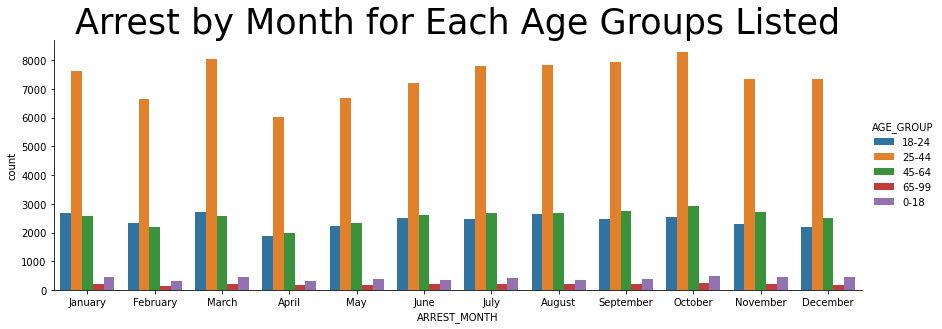

In [ ]:
# Analyze: Generate a chart to gether the arrest by Age Group for each month of hte year,
#           Describe your findings based on the visual chart.

## Observation:  Age Group 25-44 outnumbers all other Age Groups consistently every month of the
#                Year.  Additionally on average, age group 18-24 were slightly higher the first 
#                Quarter of the year, compared to age group 45-64 - the exact opposite occurs
#                the other three Quarter of the year.


category_order_month = ['January', 'February', 'March', 'April', 'May', 'June',
                 'July', 'August', 'September', 'October', 'November', 'December']
sns.catplot(x="ARREST_MONTH",
            data=df,
            hue='AGE_GROUP',
            kind='count',
            order=category_order_month,
            height=4,
            aspect=3)
plt.title('Arrest by Month for Each Age Groups Listed', size=35)

Text(0.5, 1.0, 'Age Group Arrest Volume by Borough')

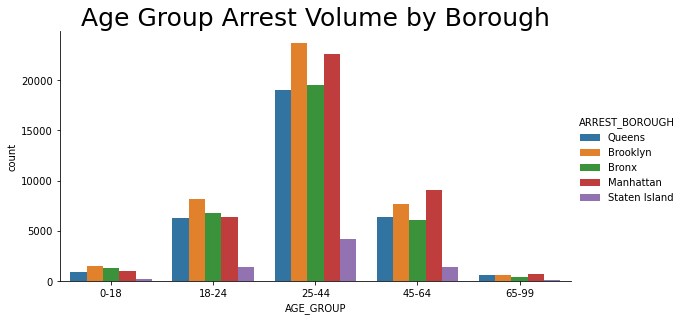

In [ ]:
# Analyze: Generate a chart to gather the arrest by Boroughs for each Age Group of the year,
#           Describe your findings based on the visual chart.

## Observation:  Age Group 25-44 were the highest of any other Age Groups and based on volume, 
#                Brooklyn and Manhattan were the most arrests in all of 2021

category_order = ['0-18', '18-24', '25-44', '45-64', '65-99']
sns.set_palette('tab10')
sns.catplot(x="AGE_GROUP", 
            data=df, 
            hue='ARREST_BOROUGH', 
            kind='count', 
            height=4,
            aspect=2,
            order=category_order,
            palette='tab10')
plt.title('Age Group Arrest Volume by Borough', size=25)

Text(0.5, 1.0, 'Borough Arrests by Perp Gender')

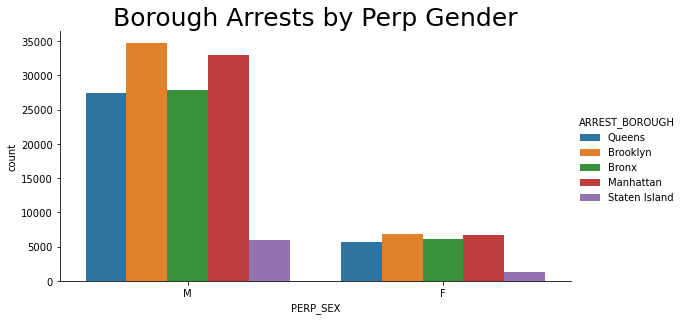

In [ ]:
# Analyze: Compare Number of arrests by Borough for by PER SEX Gender

## Observation:  Volume of arrests for the Female Perps was slighlty and consistently  
#                the same across all Boroughs (except Staten Island) compared to the Male Perp
#                counterparts where Brooklyn  and Manhattan were the top Boroughs for Arrests 
#                made in 2021.

sns.set_palette('tab10')
sns.catplot(x="PERP_SEX", 
            data=df, 
            hue='ARREST_BOROUGH', 
            kind='count', 
            height=4,
            aspect=2,
            palette='tab10')
plt.title('Borough Arrests by Perp Gender', size=25)

Text(0.5, 1.0, 'Male Perp, Arrest Violation by Borough')

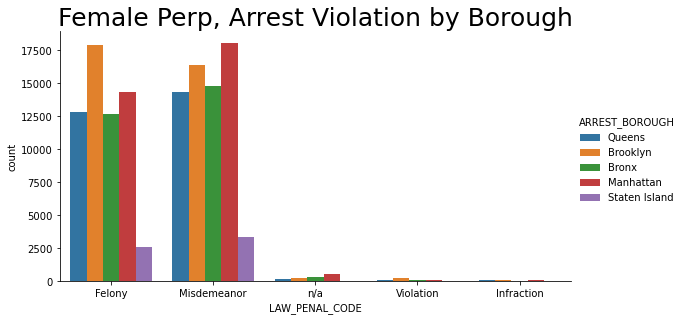

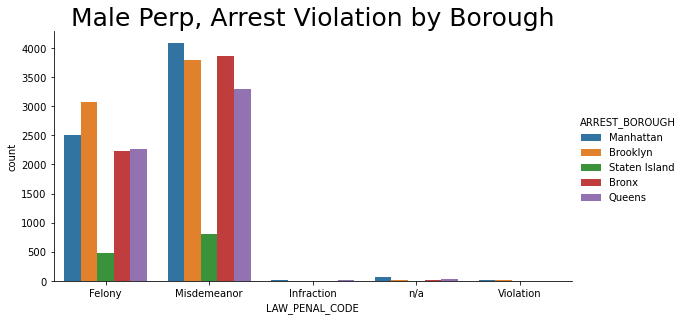

In [ ]:
# Analyze: Looking the Penal Code with the most arrests by borough - which borough had the 
#          largest difference per Penal code between Male Perps, vs. Female Perps

## Observation: The Bronx appears to be the Borough where there were significantly less female
#               perps/offenders on aveage, compared to the Male perps/offenders in 2021

sns.set_palette('tab10')
sns.catplot(x="LAW_PENAL_CODE", 
            data=df_Male, 
            hue='ARREST_BOROUGH', 
            kind='count', 
            height=4,
            aspect=2,
            palette='tab10')
plt.title('Female Perp, Arrest Violations by Borough', size=25)


sns.set_palette('tab10')
sns.catplot(x="LAW_PENAL_CODE", 
            data=df_Female, 
            hue='ARREST_BOROUGH', 
            kind='count', 
            height=4,
            aspect=2,
            palette='tab10')
plt.title('Male Perp, Arrest Violations by Borough', size=25)
